# <center>Simple Linear Regression</center>


## About this Notebook
In this notebook, we learn how to use `scikit-learn` to implement simple linear regression using dataset that is related to Fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

**`FuelConsumptionCo2.csv`** contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


- Supervised Learning:
    - Classification
    - **Regression**
    
## Practice

### 1. Import libraries and load dataset

In [1]:
# Libs to load dataset
import numpy as np
import pandas as pd

# Libs to visualize
import seaborn as sns
import matplotlib.pyplot as plt

# Libs to train models

### 2. Sanity check

In [2]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head() # df.tail() df.sample()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.shape

(1067, 13)

In [4]:
len(df), len(df.columns)

(1067, 13)

In [5]:
df.isna().sum() # df.isnull()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
df.memory_usage().sum()

111096

In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
df[['MAKE','MODEL','VEHICLECLASS','FUELTYPE','TRANSMISSION']].describe()

,MAKE,MODEL,VEHICLECLASS,FUELTYPE,TRANSMISSION
count,1067,1067,1067,1067,1067
unique,39,663,16,4,22
top,FORD,F150 FFV,MID-SIZE,X,A6
freq,90,8,178,514,222


### 3. Eploratory Data Analysis

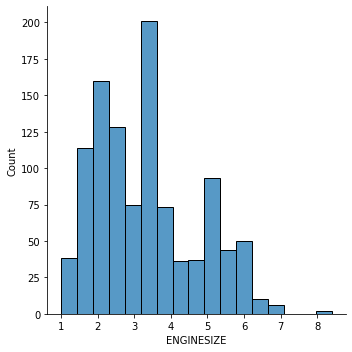

In [10]:
sns.displot(data = df['ENGINESIZE'])

<AxesSubplot:xlabel='ENGINESIZE', ylabel='Count'>

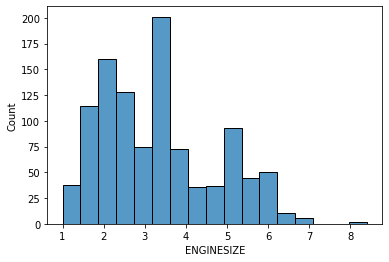

In [11]:
sns.histplot(data = df['ENGINESIZE'])

<AxesSubplot:>

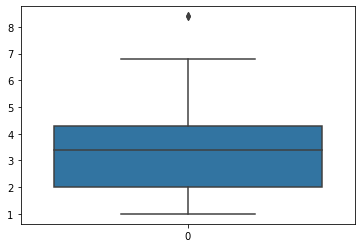

In [12]:
sns.boxplot(data = df['ENGINESIZE'])

<AxesSubplot:>

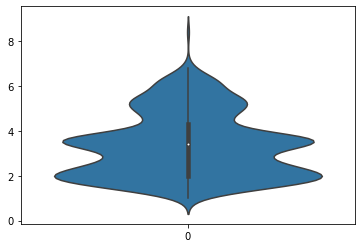

In [13]:
sns.violinplot(data = df['ENGINESIZE'])

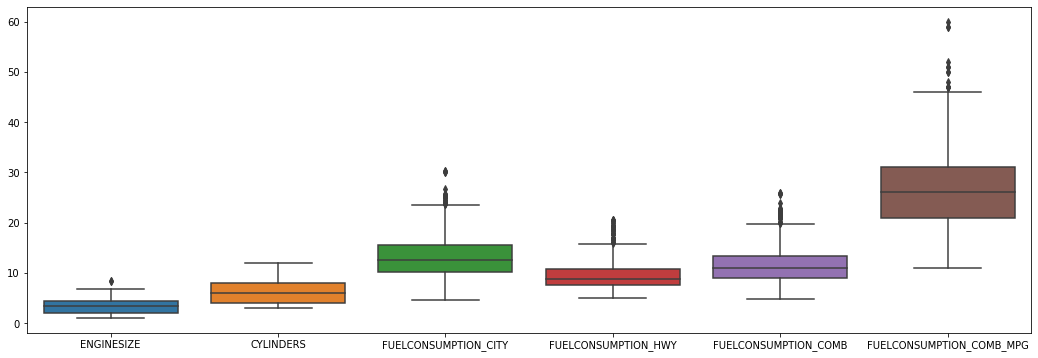

In [14]:
plt.figure(figsize=(18,6))
sns.boxplot(data = df.drop(columns = ['MODELYEAR','CO2EMISSIONS']))
plt.xticks()
plt.show()

### 4. Feature selection

In [15]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


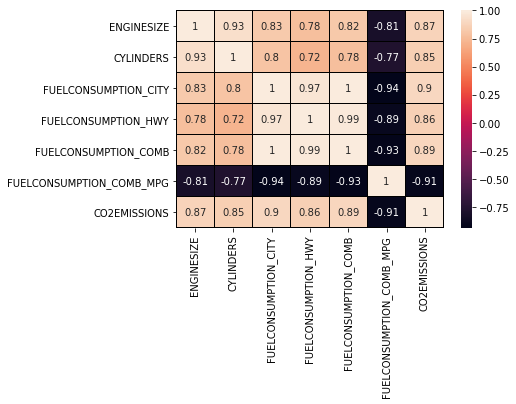

In [19]:
sns.heatmap(df.drop(columns = 'MODELYEAR').corr(), annot = True, linewidths = 0.01, linecolor = 'black')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


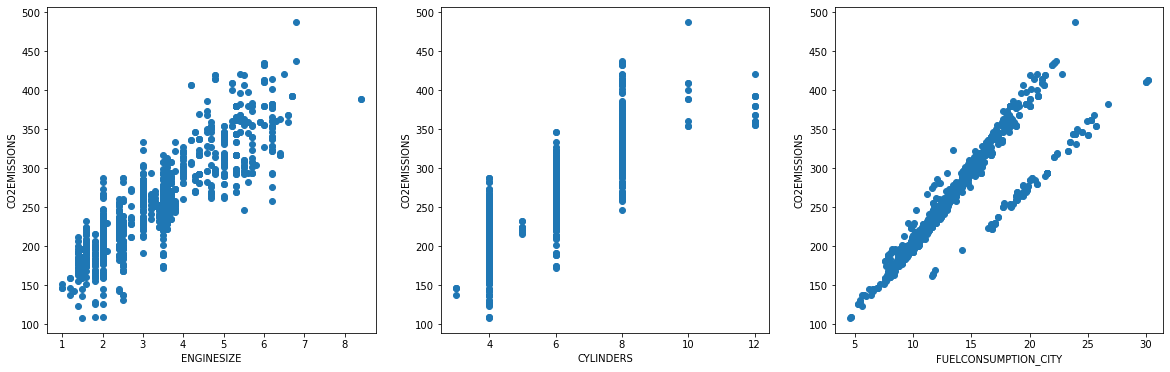

In [21]:
fig, ax = plt.subplots(1,3, figsize=(20,6))
ax[0].scatter(df.ENGINESIZE, df.CO2EMISSIONS)
ax[0].set(xlabel='ENGINESIZE', ylabel='CO2EMISSIONS')

ax[1].scatter(df.CYLINDERS, df.CO2EMISSIONS)
ax[1].set(xlabel='CYLINDERS', ylabel='CO2EMISSIONS')

ax[2].scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS)
ax[2].set(xlabel='FUELCONSUMPTION_CITY', ylabel='CO2EMISSIONS')

plt.show()


### 5. Train model

In [ ]:
!pip install sklearn

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(df[['ENGINESIZE']], df['CO2EMISSIONS'])

LinearRegression()

In [28]:
model.coef_

array([39.12519979])

In [29]:
model.intercept_

125.3040994953569

In [31]:
predictions = model.predict(df[['ENGINESIZE']])
predictions

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [32]:
# y = ax + b
predictions1 = model.coef_[0]*df[['ENGINESIZE']] + model.intercept_
predictions1

,ENGINESIZE
0,203.554499
1,219.204579
2,183.991899
3,262.242299
4,262.242299
...,...
1062,242.679699
1063,250.504739
1064,242.679699
1065,250.504739


In [34]:
pd.DataFrame({'auto': predictions,
             'manual': predictions1.ENGINESIZE.to_list()})

,auto,manual
0,203.554499,203.554499
1,219.204579,219.204579
2,183.991899,183.991899
3,262.242299,262.242299
4,262.242299,262.242299
...,...,...
1062,242.679699,242.679699
1063,250.504739,250.504739
1064,242.679699,242.679699
1065,250.504739,250.504739


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, X_test = train_test_split(df[['ENGINESIZE']], df.CO2EMISSIONS, test_size = 0.2)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
predictions2 = model.predict(X_test)

In [50]:
pd.DataFrame({'prediction': predictions2,
             'groundtruth': y_test})

,prediction,groundtruth
476,368.689481,354
1047,266.403108,248
309,266.403108,258
616,187.721282,177
361,337.216751,368
...,...,...
955,223.128104,198
757,309.678112,350
949,223.128104,258
160,203.457647,232


### 6. Evaluation

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
mean_absolute_error(y_test, predictions2)

24.0191371587129

In [54]:
mean_squared_error(y_test, predictions2)

932.2957855865387

In [55]:
r2_score(y_test, predictions2)

0.78101585054429

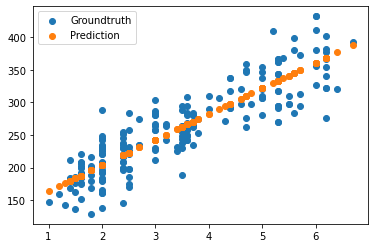

In [62]:
plt.scatter(X_test.ENGINESIZE, y_test, label = 'Groundtruth')
plt.scatter(X_test.ENGINESIZE, predictions2, label = 'Prediction')

plt.legend()
plt.show()